In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Pre-procesamiento

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Valores unicos
unique_val=np.array(train['label'])
np.unique(unique_val)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [5]:
#Datos nulos
train.isnull().values.any()

False

In [6]:
#Datos duplicados
train[train.duplicated()]

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783


In [7]:
from tensorflow.keras.utils import to_categorical
Y_train=to_categorical(train['label'])
for i in range(10):
    print(Y_train[i])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

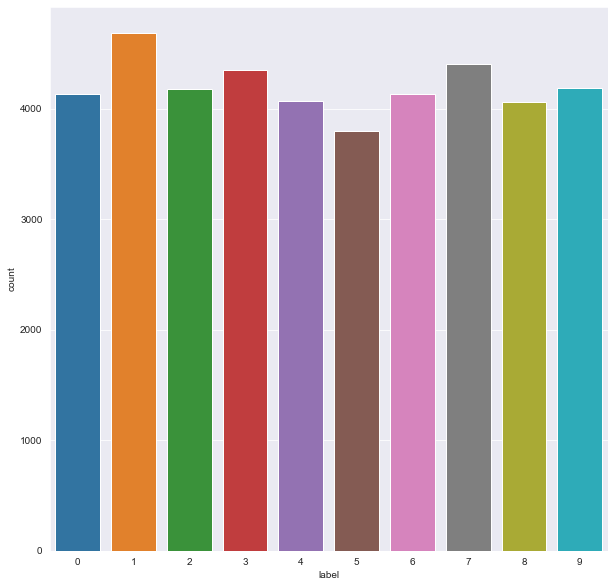

In [8]:
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.countplot(train['label'])

In [9]:
train.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

In [10]:
train=train.drop('label', axis=1)

(28, 28, 1)

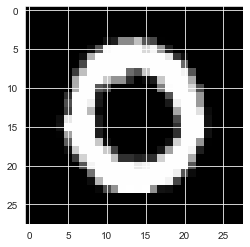

In [11]:
#Modificaciones para ingresar los datos de entrenamiento al modelo
X_train=np.array(train)
X_train=X_train.astype('float32')/255
X_train=X_train.reshape(42000,28,28,1)
plt.imshow(X_train[1],'gray')
X_train[0].shape

(28, 28, 1)

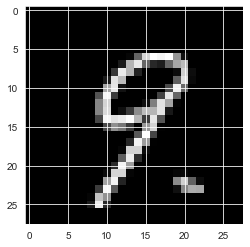

In [12]:
#Modificaciones para ingresar los datos de testeo al modelo
X_test=np.array(test)
X_test=X_test.astype('float32')/255
X_test=X_test.reshape(28000,28,28,1)
plt.imshow(X_test[2],'gray')
X_test[0].shape

## Modelo

In [13]:
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras import regularizers

In [14]:
modelo_1=models.Sequential()
modelo_1.add(layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))
modelo_1.add(layers.MaxPooling2D(pool_size=2))
modelo_1.add(layers.Dropout(0.3))

modelo_1.add(layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
modelo_1.add(layers.MaxPooling2D(pool_size=2))
modelo_1.add(layers.Dropout(0.3))

modelo_1.add(layers.Flatten())

modelo_1.add(layers.Dense(28*28, kernel_regularizer=regularizers.l2(1e-5), activation='relu'))
modelo_1.add(layers.Dropout(0.3))
modelo_1.add(layers.Dense(10, activation='softmax'))

modelo_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

In [15]:
modelo_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
callback_early=tf.keras.callbacks.EarlyStopping(monitor="accuracy", patience=3, mode="auto")
history=modelo_1.fit(X_train, Y_train, batch_size=140, epochs=10, callbacks=[callback_early], validation_split=0.2, verbose=1)

Epoch 1/10
240/240 [==============================] - 25s 98ms/step - loss: 0.3368 - accuracy: 0.8979 - val_loss: 0.0845 - val_accuracy: 0.9774
Epoch 2/10
240/240 [==============================] - 23s 95ms/step - loss: 0.1012 - accuracy: 0.9718 - val_loss: 0.0677 - val_accuracy: 0.9824
Epoch 3/10
240/240 [==============================] - 23s 96ms/step - loss: 0.0771 - accuracy: 0.9802 - val_loss: 0.0510 - val_accuracy: 0.9880
Epoch 4/10
240/240 [==============================] - 23s 96ms/step - loss: 0.0661 - accuracy: 0.9818 - val_loss: 0.0524 - val_accuracy: 0.9882
Epoch 5/10
240/240 [==============================] - 23s 96ms/step - loss: 0.0560 - accuracy: 0.9856 - val_loss: 0.0466 - val_accuracy: 0.9888
Epoch 6/10
240/240 [==============================] - 26s 109ms/step - loss: 0.0537 - accuracy: 0.9864 - val_loss: 0.0426 - val_accuracy: 0.9902
Epoch 7/10
240/240 [==============================] - 27s 112ms/step - loss: 0.0504 - accuracy: 0.9881 - val_loss: 0.0463 - val_accurac

In [17]:
modelo_1.save("modelo_digit_recognizer.h5") 

In [18]:
modelo_1 = tf.keras.models.load_model("modelo_digit_recognizer.h5")

In [19]:
predicciones=modelo_1.predict(X_test, verbose=1)

875/875 [==============================] - 7s 8ms/step


In [20]:
prediccion=np.argmax(predicciones[3])
prediccion

9

In [21]:
data=[]
for i in range(len(predicciones)):
    prediccion=np.argmax(predicciones[i])
    data.append(prediccion)
#data

In [22]:
#Se guarda las predicciones en formato csv como kaggle requiere
def write_preds(data, fname):
    pd.DataFrame({"ImageId": list(range(1,len(predicciones)+1)), "Label": data}).to_csv(fname, index=False, header=True)

write_preds(data, "Results_Digit_recognizer_v3.csv")

## Aplicacion con camara web

In [23]:
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

img=cv2.imread("siete.jpg", cv2.IMREAD_COLOR)
img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,img = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
img=cv2.resize(img,(28,28))

cv2.imshow('Siete',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

(1, 28, 28, 1)

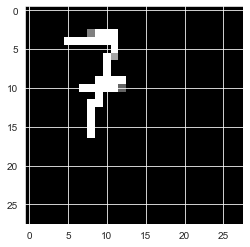

In [24]:
modelo_1 = tf.keras.models.load_model("modelo_digit_recognizer.h5")
img=np.array(img)
img=img.astype('float32')/255
plt.imshow(img, 'gray')
img = img.reshape(-1, 28, 28, 1) #Sin esto no se puede introducir al modelo
img.shape

In [25]:
prediccion=modelo_1.predict(img)
np.argmax(prediccion)

6

In [27]:
import cv2

cap = cv2.VideoCapture(0)

# font
font = cv2.FONT_HERSHEY_SIMPLEX
  
# org
org = (50, 50)
  
# fontScale
fontScale = 1
   
# Blue color in BGR
color = (255, 0, 0)
  
# Line thickness of 2 px
thickness = 2


while True:
    ret, frame = cap.read()
    frame=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    ret,frame = cv2.threshold(frame,127,255,cv2.THRESH_BINARY_INV)
    
    img=cv2.resize(frame,(28,28))
    img=np.array(img)
    img=img.astype('float32')/255
    #plt.imshow(img, 'gray')
    img = img.reshape(-1, 28, 28, 1) #Sin esto no se puede introducir al modelo
    prediccion=modelo_1.predict(img)
    prediccion=np.argmax(prediccion)
    print(prediccion)

    cv2.putText(frame, "numero: "+str(prediccion), org, font, fontScale, color, thickness, cv2.LINE_AA)
    cv2.imshow('Numero', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break  
cap.release()
cv2.destroyAllWindows()

7
7
7
7
7
4
4
4
4
4
4
4
4
4
0
4
4
1
4
4
4
4
4
7
4
7
7
7
7
4
4
8
8
8
8
8
8
8
4
8
8
8
8
4
4
8
4
4
4
4
4
8
8
4
8
4
4
8
8
8
4
4
8
4
8
4
4
8
8
8
8
8
4
8
1
8
8
8
4
6
4
8
8
4
4
4
4
7
7
4
4
4
4
4
4
1
1
8
8
8
8
8
8
4
4
4
4
0
4
0
4
4
0
0
0
0
0
0
0
0
0
1
1
7
4
4
1
1
7
4
7
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
4
1
4
7
1
1
1
1
7
7
0
0
0
0
0
0
4
0
0
4
0
4
4
4
4
4
4
0
8
8
8
8
7
7
7
7
4
4
4
4
4
8
8
8
8
1
8
8
4
8
8
8
8
8
8
8
4
8
8
8
4
4
4
4
4
4
4
1
4
4
4
4
4
1
4
4
4
4
8
8
8
8
8
8
1
8
8
8
8
6
5
5
4
4
4
4
4
4
4
4
4
4
4
7
1
1
1
8
8
8
8
8
4
4
4
4
4
4
0
4
0
0
0
0
4
3
3
7
6
6
1
1
9
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
7
7
7
5
5
5
1
1
5
5
5
5
6
3
3
6
5
5
0
0
0
4
1
2
7
7
7
1
5
3
3
3
3
3
3
5
5
0
3
1
3
3
0
6
6
5
5
6
5
6
6
6
1
5
7
7
7
7
6
4
4
8
4
1
1
8
6
5
1
1
1
5
5
4
4
1
6
8
6
6
8
8
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
7
1
1
2
3
2
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
